# Cats vs Dogs (Keras VGG16 model ) (Fast Feature extraction without Data Augmentation) 


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("./drive/My Drive")

In [0]:
base_dir = os.path.join('/content/drive/My Drive', 'cats_and_dogs_small')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
import keras
from keras.applications import VGG16

Using TensorFlow backend.


In [6]:
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 5s 0us/step


In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
#Extracting the features and labels as numpy arrays
#predict function of conv_base is used to get the features of the image
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory( directory,
  target_size=(150, 150),
  batch_size=batch_size,
  class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
        break
  return features, labels

In [9]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(val_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [0]:
#dense layers
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 730us/step - loss: 0.6017 - acc: 0.6725 - val_loss: 0.4460 - val_acc: 0.8430
Epoch 2/30
2000/2000 [==============================] - 1s 497us/step - loss: 0.4294 - acc: 0.8085 - val_loss: 0.3617 - val_acc: 0.8680
Epoch 3/30
2000/2000 [==============================] - 1s 516us/step - loss: 0.3547 - acc: 0.8550 - val_loss: 0.3208 - val_acc: 0.8700
Epoch 4/30
2000/2000 [==============================] - 1s 500us/step - loss: 0.3188 - acc: 0.8710 - val_loss: 0.2968 - val_acc: 0.8800
Epoch 5/30
2000/2000 [==============================] - 1s 502us/step - loss: 0.2926 - acc: 0.8830 - val_loss: 0.2827 - val_acc: 0.8850
Epoch 6/30
2000/2000 [==============================] - 1s 508us/step - loss: 0.2611 - acc: 0.8985 - val_loss: 0.2696 - val_acc: 0.8920
Epoch 7/30
2000/2000 [==============================] - 1s 505us/step - loss: 0.2452 - acc: 0.9000 - val_loss: 0.2628 - val_acc: 0.8960


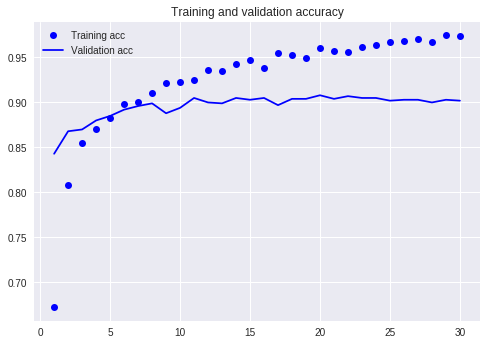

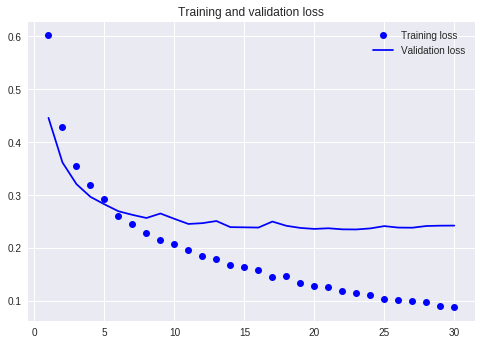

In [22]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
score = model.evaluate(test_features,test_labels)
score

1000/1000 [==============================] - 0s 135us/step


[0.2507319777905941, 0.889]